## Importing the Requierd Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Reading the csv file 

In [2]:
df= pd.read_csv("co2_emissions_canada.csv")
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,10.0,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,10.1,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,11.1,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,11.6,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,9.2,212


## Removing duplicates from the data 

In [3]:
df.drop_duplicates(inplace=True)
df.reset_index()

,index,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...,...
6066,7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
6067,7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
6068,7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
6069,7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


## Summarizing the data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6071.0,3.156679,1.366384,0.9,2.0,3.0,3.7,8.4
Cylinders,6071.0,5.614396,1.854080,3.0,4.0,6.0,6.0,16.0
Fuel Consumption Comb (L/100 km),6071.0,11.011613,2.952487,4.1,8.9,10.5,12.7,26.1
CO2 Emissions(g/km),6071.0,250.950091,59.263155,96.0,207.0,245.0,288.0,522.0


# Check outliers percentage

## In CO2 Emissions

In [5]:
z_scores = np.abs((df['CO2 Emissions(g/km)'] - df['CO2 Emissions(g/km)'].mean()) / df['CO2 Emissions(g/km)'].std())
outliers = df[z_scores > 3]
print(outliers.shape[0]*100/df.shape[0],'%')


0.6588700378850272 %


## In Cylinders	

In [6]:
z_scores = np.abs((df['Cylinders'] - df['Cylinders'].mean()) / df['Cylinders'].std())
outliers = df[z_scores > 3]
print(outliers.shape[0]*100/df.shape[0],'%')

2.256629879756218 %


## In Engine Size

In [7]:
z_scores = np.abs((df['Engine Size(L)'] - df['Engine Size(L)'].mean()) / df['Engine Size(L)'].std())
outliers = df[z_scores > 3]
print(outliers.shape[0]*100/df.shape[0],'%')

0.11530225662987975 %


## In Fuel Consumption Comb

In [8]:
z_scores = np.abs((df['Fuel Consumption Comb (L/100 km)'] - df['Fuel Consumption Comb (L/100 km)'].mean()) / df['Fuel Consumption Comb (L/100 km)'].std())
outliers = df[z_scores > 3]
print(outliers.shape[0]*100/df.shape[0],'%')

0.8400592983034096 %


# Calculating fuel type percentage

In [9]:
df.drop(axis=0,index=df[df["Fuel Type"]=='N'].index,inplace=True)
fuelTypePercentage=df["Fuel Type"].value_counts()/df.shape[0]
fuelTypePercentage

Fuel Type
X    0.482372
Z    0.440857
E    0.053213
D    0.023558
Name: count, dtype: float64

# Pie Chart Representing the percentage of every fuel type used in Canada

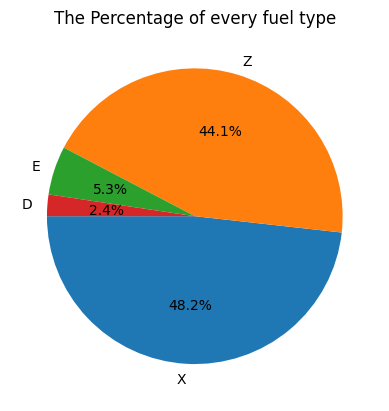

In [10]:
plt.pie(x=fuelTypePercentage.values,labels=fuelTypePercentage.index,autopct='%1.1f%%', startangle=180)
plt.title("The Percentage of every fuel type")

plt.show()

# Calculating AVG CO2 Emissions for each Fuel Type

In [11]:
avgFuelTypes=df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()

# Ploting AVG CO2 Emissions for each Fuel Type

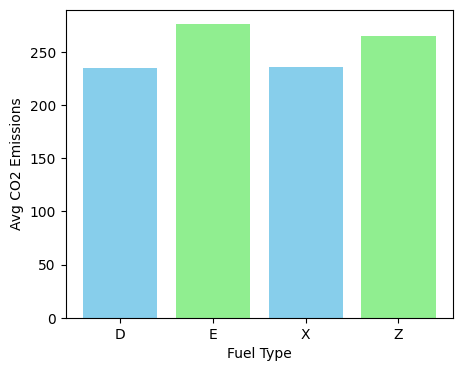

In [12]:
plt.figure(figsize=(5, 4))
plt.bar(avgFuelTypes.index, avgFuelTypes.values, color=['skyblue', 'lightgreen'],)  
plt.xlabel('Fuel Type')
plt.ylabel('Avg CO2 Emissions')
plt.xticks(rotation=0, ha='center') 
plt.show()

# Calculating AVG Fuel Consumption Comb for each Fuel Type

In [13]:
avgFuelTypesConsump=df.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean()

# Ploting AVG Fuel Consumption Comb for each Fuel Type

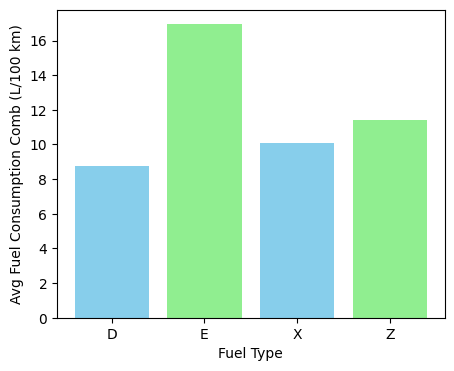

In [14]:
plt.figure(figsize=(5, 4))
plt.bar(avgFuelTypesConsump.index, avgFuelTypesConsump.values, color=['skyblue', 'lightgreen'],)  
plt.xlabel('Fuel Type')
plt.ylabel('Avg Fuel Consumption Comb (L/100 km)')
plt.xticks(rotation=0, ha='center') 
plt.show()

# The Correlation between Fuel Consumption and CO2 Emission

<function matplotlib.pyplot.show(close=None, block=None)>

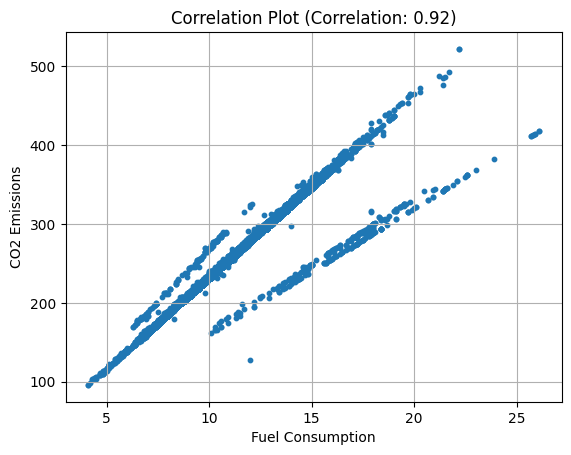

In [15]:
plt.scatter(df["Fuel Consumption Comb (L/100 km)"],df["CO2 Emissions(g/km)"],s=10)
correlation = df['Fuel Consumption Comb (L/100 km)'].corr(df['CO2 Emissions(g/km)'])
plt.title('Correlation Plot (Correlation: {:.2f})'.format(correlation))
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.grid(True)

plt.show

# A Comparison between SUV-SMALL and MID-SIZE 

In [16]:
grouped_midVSsmall = df[df['Vehicle Class'].isin(['SUV - SMALL','MID-SIZE'])].groupby('Vehicle Class')
midVSsmall=grouped_midVSsmall["CO2 Emissions(g/km)"].mean()
midVSsmall={'Vehicle Class':['SUV - SMALL','MID-SIZE'],
      'Avg CO2 Emissions':[midVSsmall.values[0],midVSsmall.values[1]]}
midVSsmall=pd.DataFrame(midVSsmall)
midVSsmall


,Vehicle Class,Avg CO2 Emissions
0,SUV - SMALL,222.448718
1,MID-SIZE,236.082317


# A bar blot representing the avg CO2 Emissions for both classes

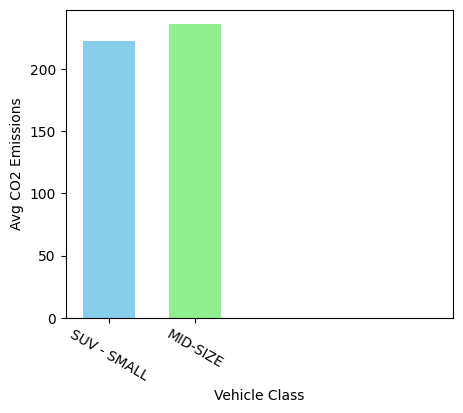

In [17]:
plt.figure(figsize=(5, 4))
plt.bar(midVSsmall['Vehicle Class'], midVSsmall['Avg CO2 Emissions'], color=['skyblue', 'lightgreen'],width=.6)  
plt.xlabel('Vehicle Class')
plt.ylabel('Avg CO2 Emissions')
plt.xticks(rotation=-30, ha='center') 
plt.xlim(-.5,4)

plt.show()

# Calculating the Avg of CO2 Emission for different Engine Sizes

In [18]:
AVGForAll=df["CO2 Emissions(g/km)"].mean()
data=df[df["Engine Size(L)"]<=2 ]
AVGForLessThan2=data["CO2 Emissions(g/km)"].mean()

In [19]:
allVSless2={'Engine Size':['ALL','Less than or Equal 2'],
      'Avg CO2 Emissions':[AVGForAll,AVGForLessThan2]}
allVSless2=pd.DataFrame(allVSless2)

# Comparison between the avg Co2 emission for all cars and Co2 emission for cars with engine size less than or equal 2

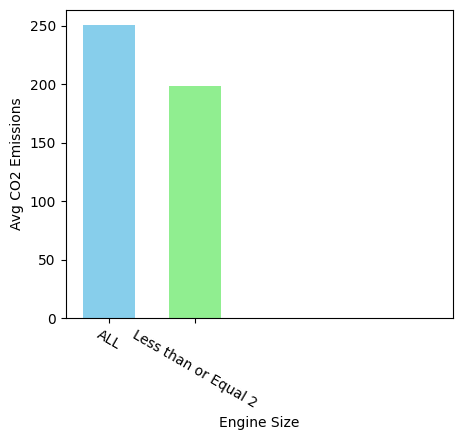

In [20]:
plt.figure(figsize=(5, 4))
plt.bar(allVSless2['Engine Size'], allVSless2['Avg CO2 Emissions'], color=['skyblue', 'lightgreen'],width=.6)
plt.xlabel('Engine Size')
plt.ylabel('Avg CO2 Emissions')
plt.xticks(rotation=-30, ha='center') 
plt.xlim(-.5,4)

plt.show()

# Factorizing The Colums Containing Strings

In [21]:
realDataFtame=pd.DataFrame()
realDataFtame=df.copy()
df['Make'],Makeunique_labels=pd.factorize(df['Make'])
df['Model'],Modelunique_labels=pd.factorize(df['Model'])
df['Vehicle Class'],Classunique_labels=pd.factorize(df['Vehicle Class'])
df['Transmission'],Trunique_labels=pd.factorize(df['Transmission'])
df['Fuel Type'],FTunique_labels=pd.factorize(df['Fuel Type'])

# Changing Columns' Names

In [22]:
df["FuelConsump"]=df["Fuel Consumption Comb (L/100 km)"]
df["CO2"]=df['CO2 Emissions(g/km)']
df.drop(columns=["Fuel Consumption Comb (L/100 km)",'CO2 Emissions(g/km)'],inplace=True)


# Calculating the Correlation Matrix

In [23]:
corr_matrix=df.corr()

# Drawing HeatMap

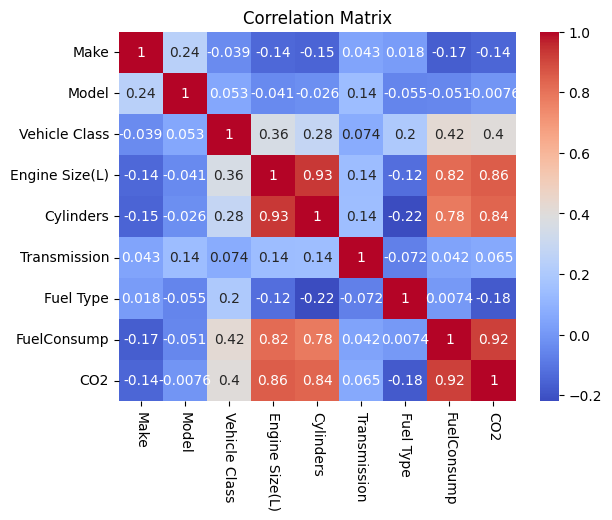

In [24]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Add annotations and choose a colormap

# Customize the plot (optional)
plt.xticks(rotation=-90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title('Correlation Matrix')
plt.show()

# Returning the original data before factorizing excluding the low correlation columns

In [25]:
df=realDataFtame[['Vehicle Class','Cylinders','Engine Size(L)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
df["FuelConsump"]=df["Fuel Consumption Comb (L/100 km)"]
df["CO2"]=df['CO2 Emissions(g/km)']
df.drop(columns=["Fuel Consumption Comb (L/100 km)",'CO2 Emissions(g/km)'],inplace=True)


# Smallest Engine Sizes

In [26]:
df.nsmallest(n=10,columns="Engine Size(L)")

,Vehicle Class,Cylinders,Engine Size(L),FuelConsump,CO2
3189,TWO-SEATER,3,0.9,6.9,157
3190,TWO-SEATER,3,0.9,6.9,157
4255,TWO-SEATER,3,0.9,6.7,152
394,SUBCOMPACT,4,1.0,6.6,152
943,TWO-SEATER,3,1.0,6.4,147
944,TWO-SEATER,3,1.0,6.4,147
1479,SUBCOMPACT,3,1.0,6.6,152
1485,COMPACT,3,1.0,7.1,163
2072,TWO-SEATER,3,1.0,6.5,150
2073,TWO-SEATER,3,1.0,6.5,150


# The least Cylinders

In [27]:
df.nsmallest(n=10,columns="Cylinders")

,Vehicle Class,Cylinders,Engine Size(L),FuelConsump,CO2
828,COMPACT,3,1.2,6.0,138
829,COMPACT,3,1.2,6.4,147
943,TWO-SEATER,3,1.0,6.4,147
944,TWO-SEATER,3,1.0,6.4,147
1479,SUBCOMPACT,3,1.0,6.6,152
1485,COMPACT,3,1.0,7.1,163
1886,SUBCOMPACT,3,1.5,7.5,172
1887,SUBCOMPACT,3,1.5,7.1,163
1888,SUBCOMPACT,3,1.5,7.5,172
1889,SUBCOMPACT,3,1.5,7.2,166


# The Smallest Amount of Co2 Emitted

In [28]:
df.nsmallest(n=10,columns="CO2")

,Vehicle Class,Cylinders,Engine Size(L),FuelConsump,CO2
3824,FULL-SIZE,4,1.6,4.1,96
5931,FULL-SIZE,4,1.6,4.1,96
6949,FULL-SIZE,4,1.6,4.2,99
4899,FULL-SIZE,4,1.6,4.3,102
3823,FULL-SIZE,4,1.6,4.4,103
3229,MID-SIZE,4,1.8,4.5,104
5930,FULL-SIZE,4,1.6,4.3,104
4297,MID-SIZE,4,1.8,4.5,105
6442,MID-SIZE,4,1.8,4.4,105
7335,COMPACT,4,1.8,4.5,106


# The Largest Amount of Co2 Emitted

In [29]:
df.nlargest(n=10,columns='CO2')

,Vehicle Class,Cylinders,Engine Size(L),FuelConsump,CO2
4509,TWO-SEATER,16,8.0,22.2,522
5575,TWO-SEATER,16,8.0,22.2,522
6046,TWO-SEATER,12,6.5,21.7,493
349,VAN - PASSENGER,10,6.8,21.2,488
6045,TWO-SEATER,12,6.5,21.5,487
7058,TWO-SEATER,12,6.5,21.4,485
2971,SUV - STANDARD,12,6.0,21.4,476
5126,SUV - STANDARD,12,6.0,20.3,473
4049,SUV - STANDARD,12,6.0,20.3,467
2434,VAN - PASSENGER,8,6.0,19.8,465


# Calculating Avg Co2 Emissions for each Cylinder

In [30]:
avgCylinders=df.groupby('Cylinders')['CO2'].mean()

# Plotting Avg Co2 Emission for each Cylinder

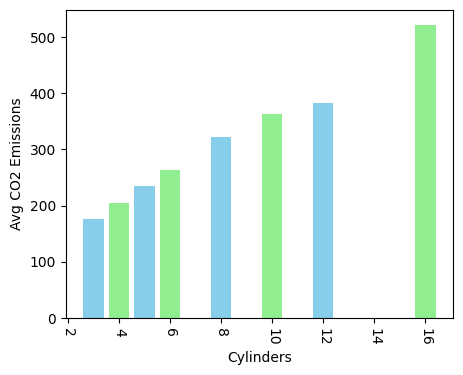

In [31]:
plt.figure(figsize=(5, 4))
plt.bar(avgCylinders.index, avgCylinders.values, color=['skyblue', 'lightgreen'],)  
plt.xlabel('Cylinders')
plt.ylabel('Avg CO2 Emissions')
plt.xticks(rotation=-90, ha='center') 
plt.show()

# The Relation between Co2 Emission and Engine Size

<function matplotlib.pyplot.show(close=None, block=None)>

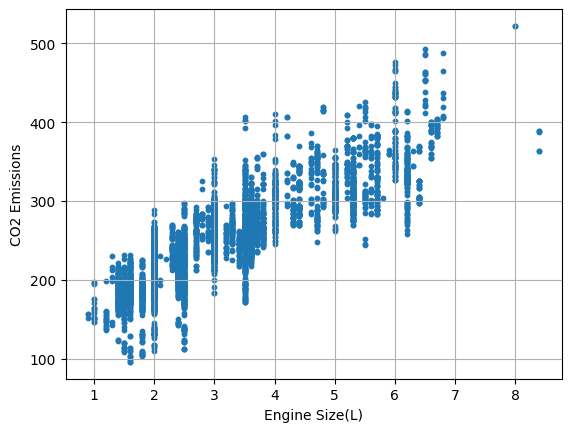

In [32]:
plt.scatter(df["Engine Size(L)"],df["CO2"],s=10)
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emissions")
plt.grid(True)
plt.show

# The Relation between Cylinders and Engine Size

<function matplotlib.pyplot.show(close=None, block=None)>

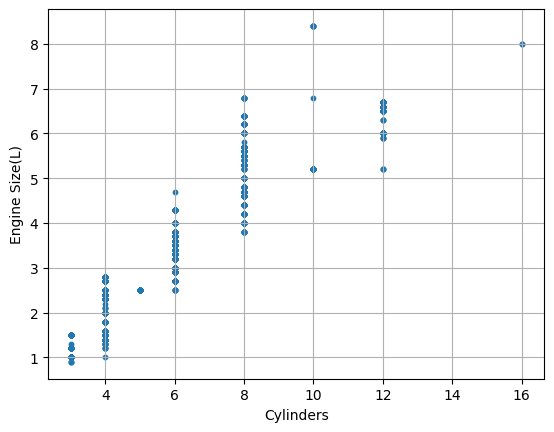

In [33]:
plt.scatter(df["Cylinders"],df["Engine Size(L)"],s=10)
plt.xlabel("Cylinders")
plt.ylabel("Engine Size(L)")
plt.grid(True)
plt.show

# Comparison between the avg Co2 emission for all cars and Co2 emission for cars with engine size less than  2

In [34]:
AVGForAll=df["CO2"].mean()
data=df[df["Engine Size(L)"]<2 ]
AVGForLessThan2=data["CO2"].mean()

In [35]:
allVSless2={'Engine Size':['ALL','Less than 2'],
      'Avg CO2 Emissions':[AVGForAll,AVGForLessThan2]}
allVSless2=pd.DataFrame(allVSless2)

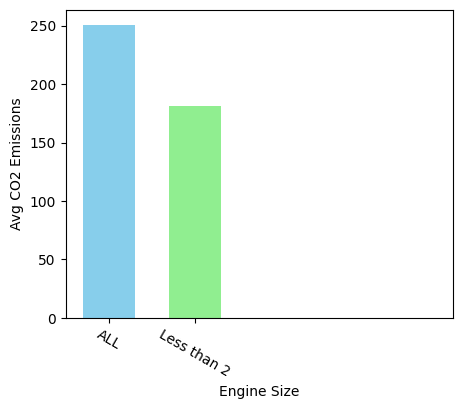

In [36]:
plt.figure(figsize=(5, 4))
plt.bar(allVSless2['Engine Size'], allVSless2['Avg CO2 Emissions'], color=['skyblue', 'lightgreen'],width=.6)
plt.xlabel('Engine Size')
plt.ylabel('Avg CO2 Emissions')
plt.xticks(rotation=-30, ha='center') 
plt.xlim(-.5,4)

plt.show()

# Comparison between the avg Co2 emission for all cars and Co2 emission for cars with Cylinders less than or equal 4

In [37]:
AVGForAll2=df["CO2"].mean()
data=df[df["Cylinders"]<=4 ]
AVGForLessThan4=data["CO2"].mean()

In [38]:
allVSless4={'Cylinders':['ALL','Less than or equal 4'],
      'Avg CO2 Emissions':[AVGForAll2,AVGForLessThan4]}
allVSless4=pd.DataFrame(allVSless4)

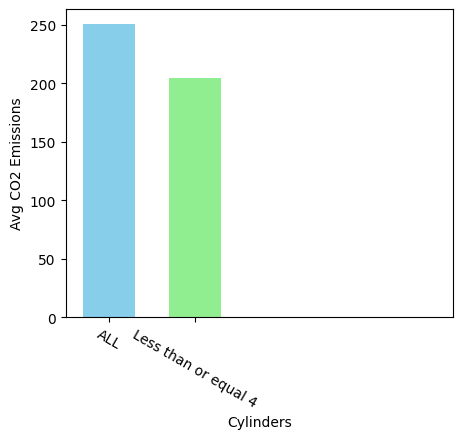

In [39]:
plt.figure(figsize=(5, 4))
plt.bar(allVSless4['Cylinders'], allVSless4['Avg CO2 Emissions'], color=['skyblue', 'lightgreen'],width=.6)
plt.xlabel('Cylinders')
plt.ylabel('Avg CO2 Emissions')
plt.xticks(rotation=-30, ha='center') 
plt.xlim(-.5,4)
plt.show()

In [40]:
data =df[df["Cylinders"]<=4]
data=data[data['Engine Size(L)']<2]

avg=df.groupby('Vehicle Class')['CO2'].mean()
avg2=data.groupby('Vehicle Class')['CO2'].mean()


# Largest Amount of Co2 Emitted when cylinder <= 4 and Engine Size < 2

In [41]:
data.nlargest(n=10,columns='CO2')

,Vehicle Class,Cylinders,Engine Size(L),FuelConsump,CO2
430,SPECIAL PURPOSE VEHICLE,4,1.6,10.1,232
5744,SUV - SMALL,4,1.5,9.9,232
6015,SUV - SMALL,4,1.3,9.9,230
2836,FULL-SIZE,4,1.6,9.7,228
2837,FULL-SIZE,4,1.6,9.8,227
3642,SUV - SMALL,4,1.5,9.6,226
4896,FULL-SIZE,4,1.6,9.6,226
608,FULL-SIZE,4,1.6,9.8,225
5428,STATION WAGON - SMALL,4,1.8,9.6,225
6477,STATION WAGON - SMALL,4,1.8,9.6,225


# Calculating Percentage of every Vehicle Class

In [42]:
data.drop(axis=0,index=data[data["Vehicle Class"]=='STATION WAGON - MID-SIZE'].index,inplace=True)
VHclassPercentage=data["Vehicle Class"].value_counts()/data.shape[0]
VHclassPercentage

Vehicle Class
COMPACT                    0.294762
MID-SIZE                   0.200974
STATION WAGON - SMALL      0.127893
SUV - SMALL                0.120585
SUBCOMPACT                 0.076736
MINICOMPACT                0.069428
TWO-SEATER                 0.057247
FULL-SIZE                  0.047503
SPECIAL PURPOSE VEHICLE    0.004872
Name: count, dtype: float64

# Ploting Percentage of every Vehicle Class

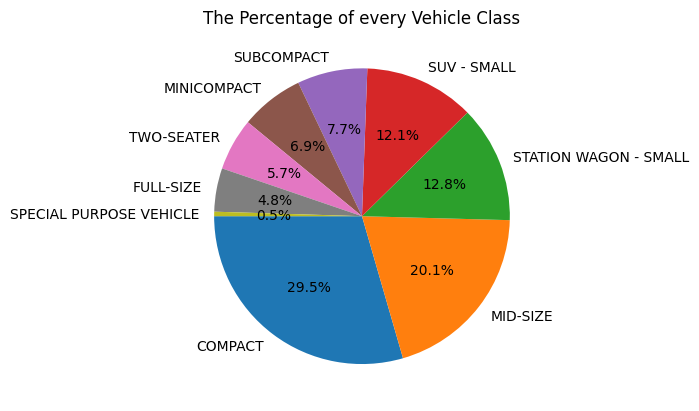

In [43]:
plt.pie(x=VHclassPercentage.values,labels=VHclassPercentage.index,autopct='%1.1f%%', startangle=180)
plt.title("The Percentage of every Vehicle Class")

plt.show()

# Avg Co2 Emission for each Vehicle Class

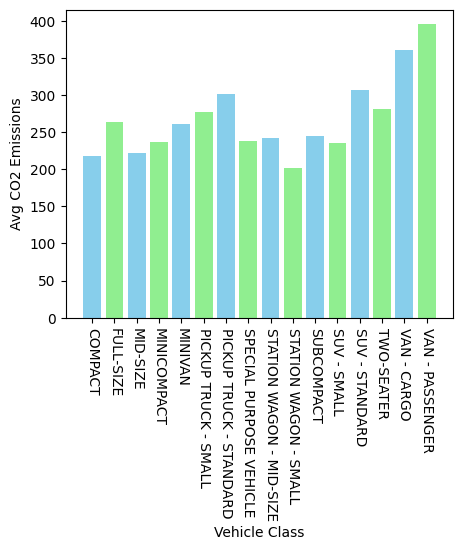

In [44]:
plt.figure(figsize=(5, 4))
plt.bar(avg.index, avg.values, color=['skyblue', 'lightgreen'],)  
plt.xlabel('Vehicle Class')
plt.ylabel('Avg CO2 Emissions')
plt.xticks(rotation=-90, ha='center') 
plt.show()

# Avg Co2 Emission for each Vehicle Class when cylinder <= 4 and Engine Size < 2

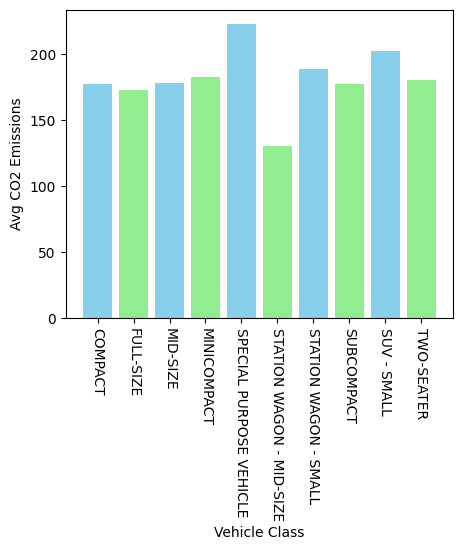

In [45]:
plt.figure(figsize=(5, 4))
plt.bar(avg2.index, avg2.values, color=['skyblue', 'lightgreen'],)  
plt.xlabel('Vehicle Class')
plt.ylabel('Avg CO2 Emissions')
plt.xticks(rotation=-90, ha='center') 
plt.show()

# Co2 Emissions Dashboard

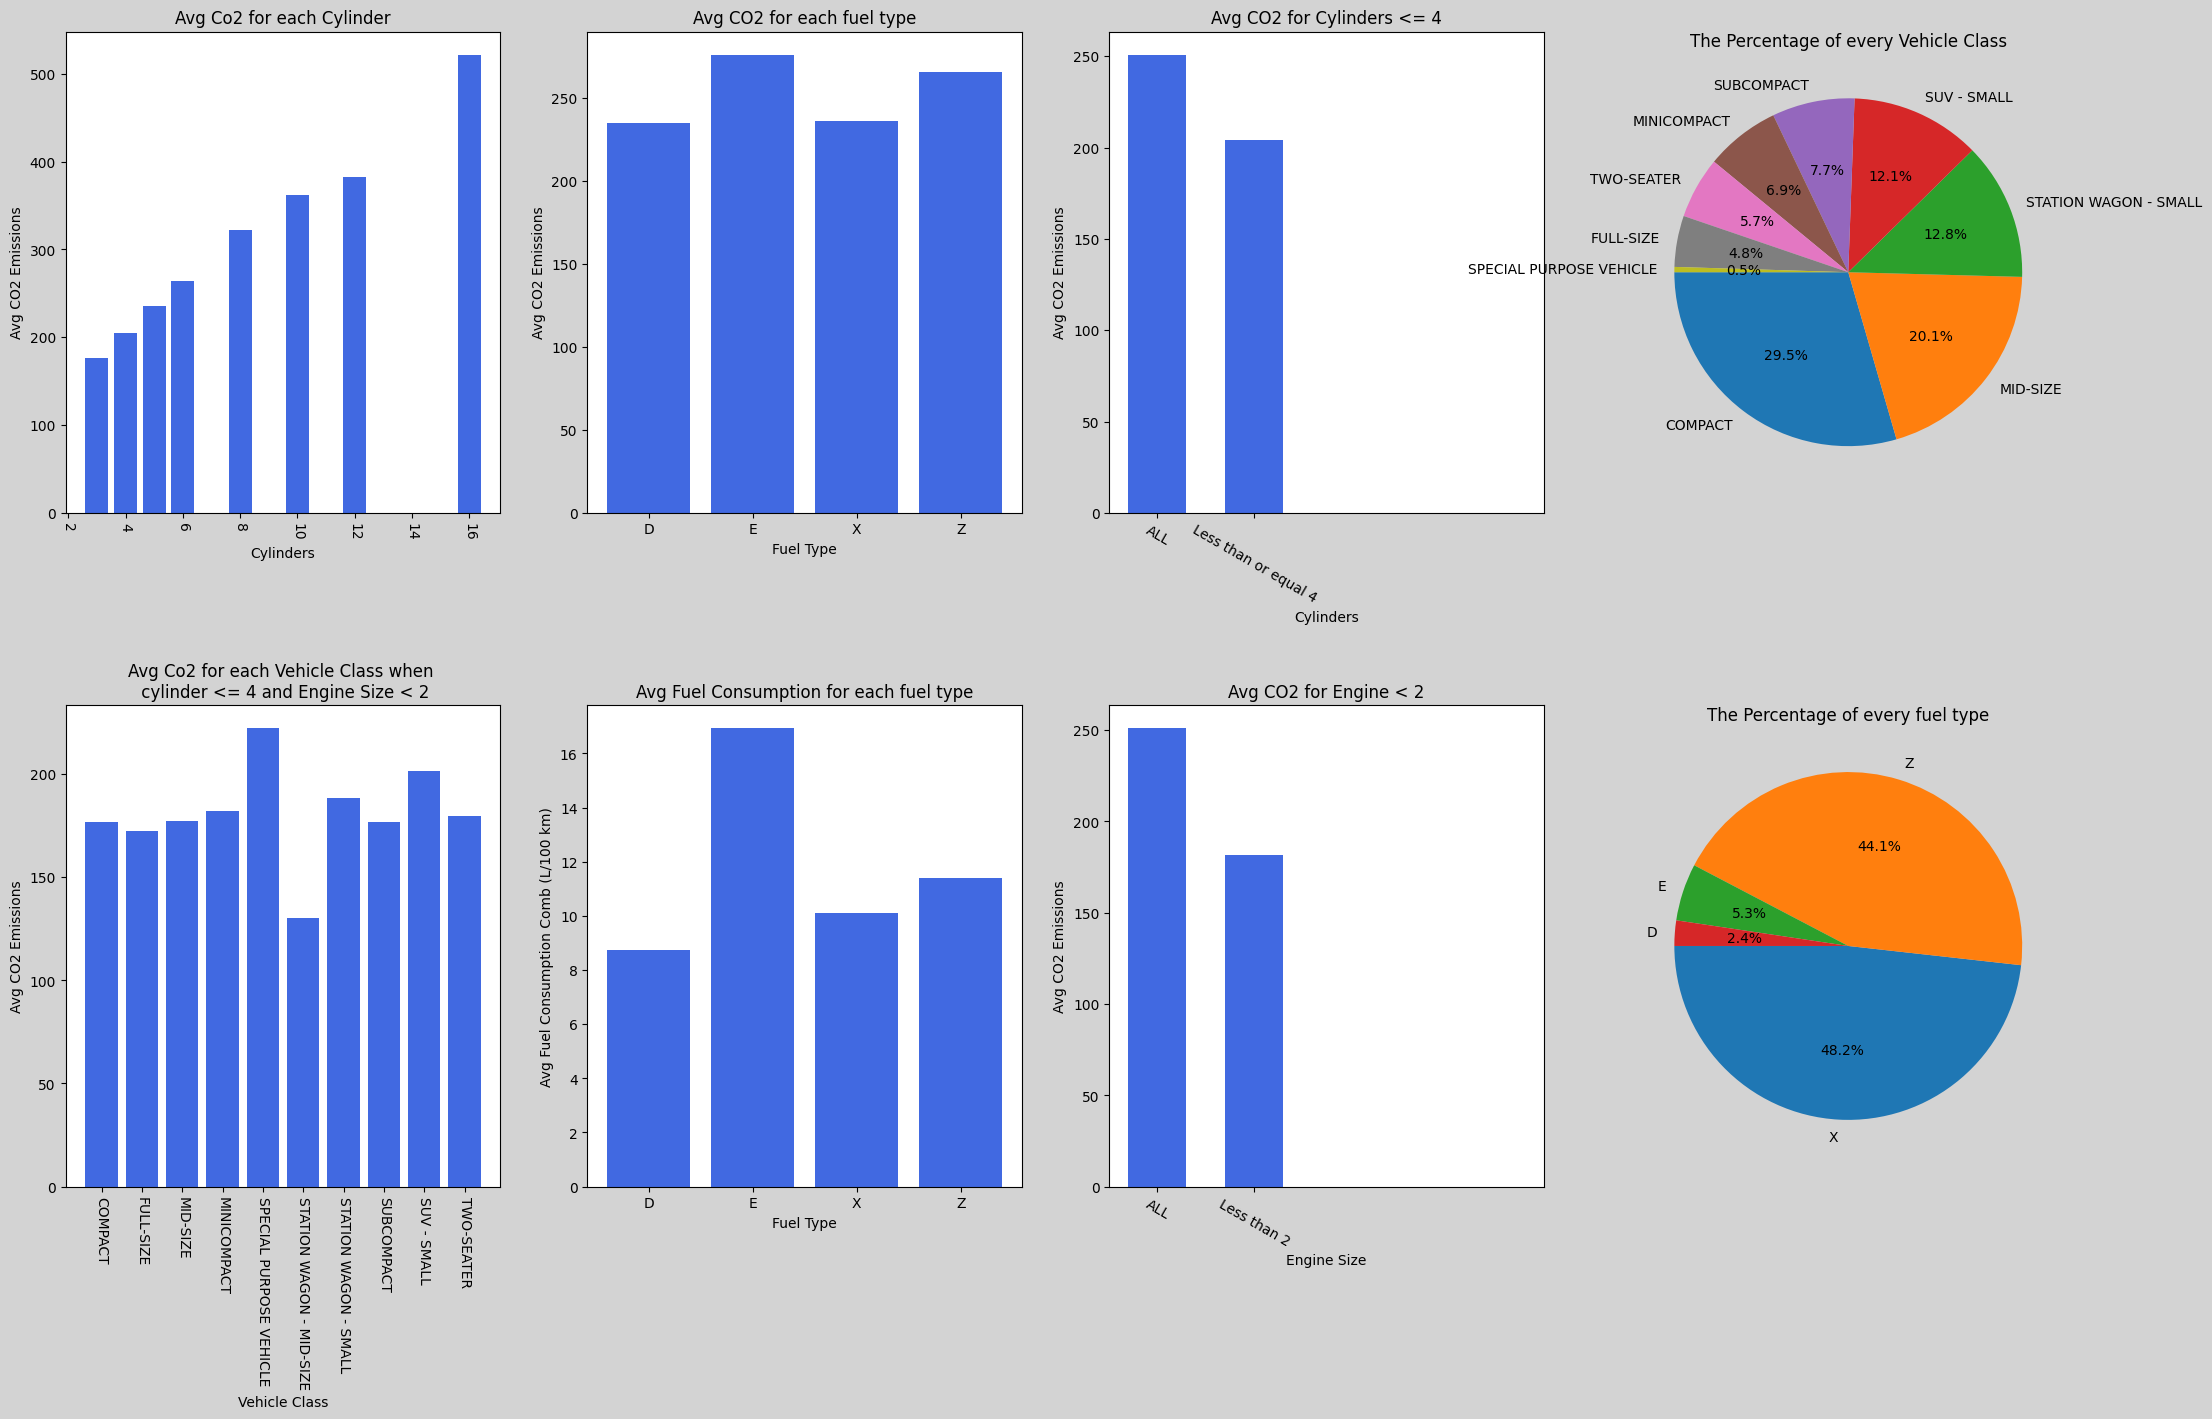

In [46]:
import matplotlib.pyplot as ax4
from matplotlib import gridspec
fig = plt.figure(figsize=(25, 15),facecolor='lightgray')
plt.subplots_adjust(left=0.1, right=0.9, hspace=.4,)
# plt.suptitle("Co2 Emissions Relations", fontsize=15,)
gs = gridspec.GridSpec(2, 4, height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0,0])  
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[0,2])  
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[0,3])
ax8 = fig.add_subplot(gs[1,3])
ax3.bar(avg2.index, avg2.values, color='royalblue',)  
ax3.set_xlabel('Vehicle Class')
ax3.set_ylabel('Avg CO2 Emissions')
ax3.set_title('Avg Co2 for each Vehicle Class when \n cylinder <= 4 and Engine Size < 2')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=-90,ha='center')
ax2.bar(avgFuelTypes.index, avgFuelTypes.values, color='royalblue',)  
ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('Avg CO2 Emissions')
ax2.set_title('Avg CO2 for each fuel type')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=0, ha='center') 
ax1.bar(avgCylinders.index, avgCylinders.values, color='royalblue')  
ax1.set_xlabel('Cylinders')
ax1.set_ylabel('Avg CO2 Emissions')
ax1.set_title('Avg Co2 for each Cylinder')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=-90, ha='center') 
ax5.bar(avgFuelTypesConsump.index, avgFuelTypesConsump.values, color='royalblue',)  
ax5.set_xlabel('Fuel Type')
ax5.set_ylabel('Avg Fuel Consumption Comb (L/100 km)')
ax5.set_title('Avg Fuel Consumption for each fuel type')
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=0, ha='center') 
ax4.bar(allVSless4['Cylinders'], allVSless4['Avg CO2 Emissions'], color='royalblue',width=.6)
ax4.set_xlabel('Cylinders')
ax4.set_ylabel('Avg CO2 Emissions')
ax4.set_title('Avg CO2 for Cylinders <= 4')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=-30, ha='center') 
ax4.set_xlim(-.5,4)
ax6.bar(allVSless2['Engine Size'], allVSless2['Avg CO2 Emissions'], color='royalblue',width=.6)
ax6.set_xlabel('Engine Size')
ax6.set_ylabel('Avg CO2 Emissions')
ax6.set_title('Avg CO2 for Engine < 2')
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=-30, ha='center') 
ax6.set_xlim(-.5,4)
ax7.pie(x=VHclassPercentage.values,labels=VHclassPercentage.index,autopct='%1.1f%%', startangle=180)
ax7.set_title("The Percentage of every Vehicle Class")
ax8.pie(x=fuelTypePercentage.values,labels=fuelTypePercentage.index,autopct='%1.1f%%', startangle=180)
ax8.set_title("The Percentage of every fuel type")
plt.show()

# Story

first we got an overview about data we have 9 columns
- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 
## we need to got a conclusion to reduce the CO2 Emissions
1. we found that the most used fuel type is x which emittes the least co2 amount
2. we calculated the correlation between all columns and CO2 Emissions 
3. we found that  Vehicle Class,Engine Size,Cylinders and Fuel Consumption have the highest correlation amongs all the columns
4. the Fuel Consumption have the highest correlation but thats not a thing we can control because that depends on other factors like Engine Size and Cylinders
5. we plotted the relation between avg co2 emission with number of cylinders and found that the number of cylinders less than or equal 4 emit less co2 
6. we also plotted the relation between co2 emission and the size of engine we found that the bigger the engine size is the more co2 emitted and that  we better keep engine size less than 2
7. as conclusion we will be using cylinders less than or equal 4 and engine size less than 2 for all the upcoming analysis
8. we also found that the vehicle class can affect the amount of CO2 emitted
9. we plotted the relation between avg co2 emission and the vehicle class and we found that there is not a big difference between different vehicle classes excluding SPECIAL PURPOSE VEHICLE and STATION WAGON - MID-SIZE but they are just .5% of data so we can't rely on them in the analysis
## Conclusion 
- We need a vehicle with engine size less than 2 , Cylinders less than or equal 4 and uses Fuel type x in order to reduce co2 emittion 
